# Student Performance Indicator

### Life cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis
- Data Pre-processing
- Model Training
- Choose best model

## 1) Problem Statement
- This project analyzes how the student's performance (test scores) is affected by other variables sucha as Gender, Ethnicity, Parental level of Education, Lunch and Test preparation course.

## 2) Data Collection
- Dataset Source - [Kaggle: Student Performance Dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
- The data consists of 8 columns and 1000 rows.

### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings library.

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import the csv Data as Pandas DataFrame

In [2]:
# read in the data
df = pd.read_csv("https://raw.githubusercontent.com/im-vishal/artifacts/refs/heads/main/student.csv")

In [3]:
# show the top 5 records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# shape of the dataset
df.shape

(1000, 8)

### 2.2 Dataset Information

- gender: sex of students -> (male, female)
- race_ethnicity -> (group A, B, C, D, E)
- parental_level_of_education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch -> having lunch before test (standard or free/ reduced)
- test_preparation_course -> (completed , none)
- math score
- reading score
- writing score

## 3) Data checks to perform
- Check missing values
- Check duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

### 3.2 Check duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicate values in the data set

### 3.3 Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Check the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observations:
- From above description of numerical data, all means are very close to each other - between 66 and 69.2
- All standard deviations are also close - between 14.6 and 15.20
- While there is a minimum score 0 for math, for writing minimum is higher = 10 and for reading it is still higher = 17

### 3.7 Exploring data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# get categories in categorical columns
cat_columns = df.select_dtypes(include="object").columns

for column in cat_columns:
    print(f"Categories in '{column}' column: {df[column].unique()}")

Categories in 'gender' column: ['female' 'male']
Categories in 'race_ethnicity' column: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' column: ['standard' 'free/reduced']
Categories in 'test_preparation_course' column: ['none' 'completed']


In [14]:
# define numerical & categorical columns
numeric_features = df.select_dtypes(include=np.number).columns
categorical_features = df.select_dtypes(include="object").columns

print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: Index(['math_score', 'reading_score', 'writing_score'], dtype='object')
We have 5 categorical features: Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [16]:
# Number of students getting full marks
for column in numeric_features:
    full = df[df[column] == 100].shape[0]
    print(f"Number of students with full marks in '{column.split('_')[0]}': {full}")
print("-------------------")

# Number of students getting less than and equal 20 marks
for column in numeric_features:
    less_than_20 = df[df[column] <= 20].shape[0]
    print(f"Number of students with less than 20 marks in '{column.split('_')[0]}': {less_than_20}")

Number of students with full marks in 'math': 7
Number of students with full marks in 'reading': 17
Number of students with full marks in 'writing': 14
-------------------
Number of students with less than 20 marks in 'math': 4
Number of students with less than 20 marks in 'reading': 1
Number of students with less than 20 marks in 'writing': 3


Observation:
- Students have performed worst in Maths
- Best performance in reading section

### 3.8 Feature Engineering
- Creating 2 new columns "Total score" and "average"

In [17]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average"] = df["total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## 4) Exploring Data (Visualization)

### 4.1 Average score distribution to make some conclusion on Histogram and KDE

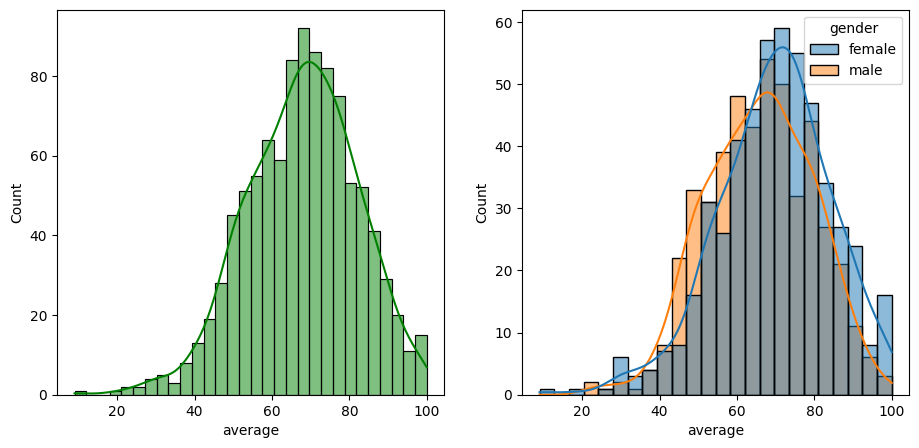

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')

plt.show()

Observation:
- Female students tend to perform well than male students

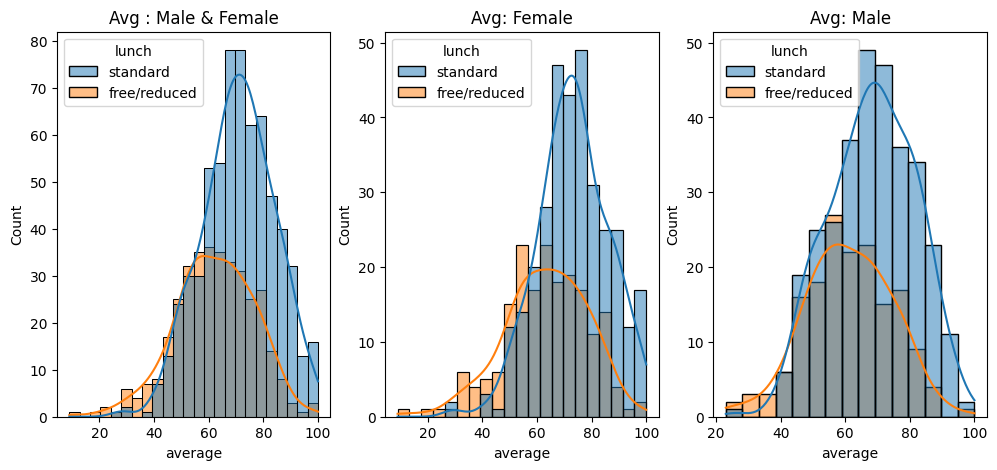

In [22]:
# impact of lunch type on avarage

hue_order = df['lunch'].unique()

plt.subplots(1, 3, figsize=(12,5))
plt.subplot(131)
sns.histplot(data=df, x="average", kde=True, hue="lunch", hue_order=hue_order)
plt.title("Avg : Male & Female")

plt.subplot(132)
sns.histplot(data=df[df.gender == "female"], x="average", kde=True, hue="lunch", hue_order=hue_order)
plt.title("Avg: Female")

plt.subplot(133)
sns.histplot(data=df[df.gender == "male"], x="average", kde=True, hue="lunch", hue_order=hue_order)
plt.title("Avg: Male")

plt.show()

Observation:
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or female.

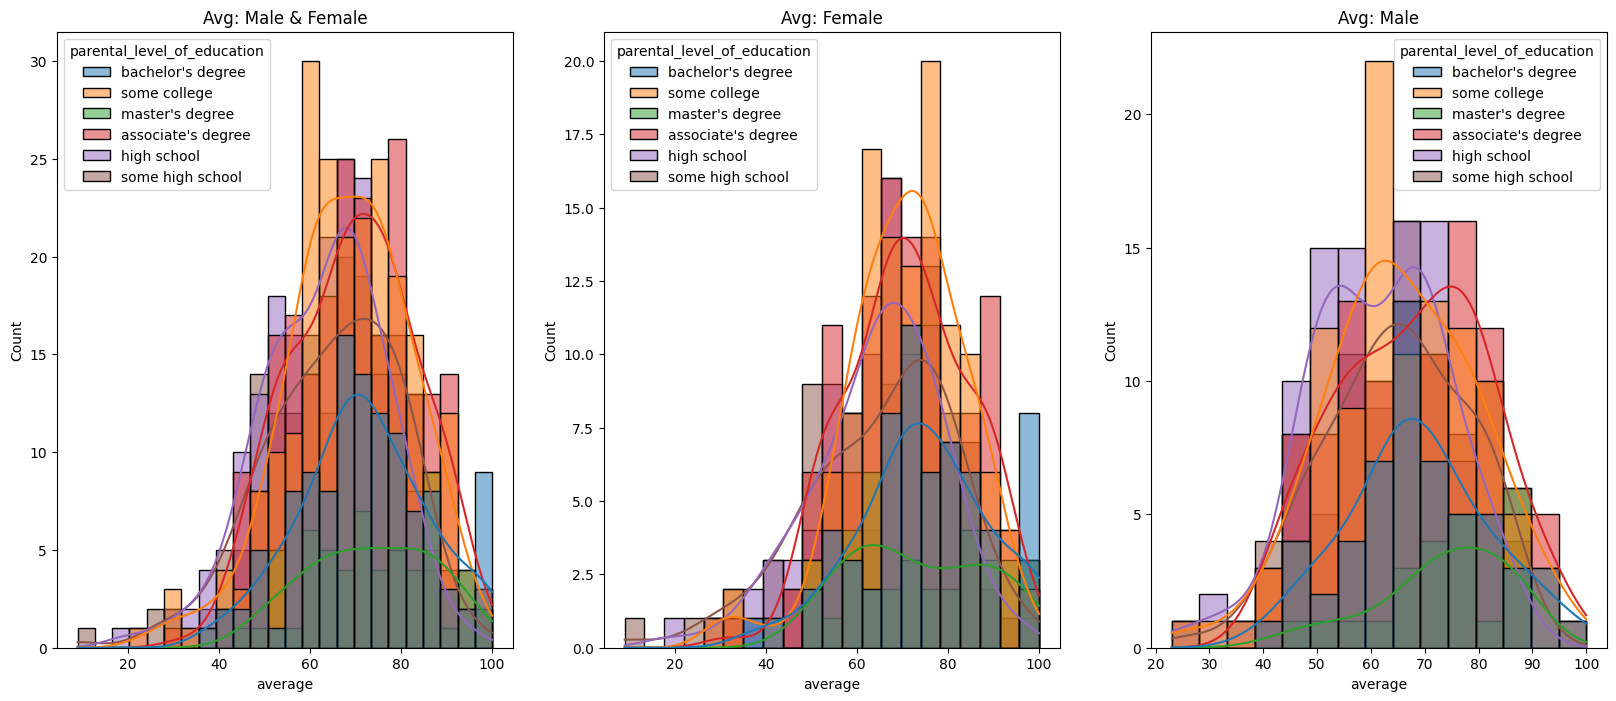

In [23]:
# impact of parental level of education on average

hue_order = df['parental_level_of_education'].unique()

plt.subplots(1,3, figsize=(20,8))
plt.subplot(131)
sns.histplot(data=df, x="average", kde=True, hue="parental_level_of_education", hue_order=hue_order)
plt.title("Avg: Male & Female")

plt.subplot(132)
sns.histplot(data=df[df.gender == "female"], x="average", kde=True, hue="parental_level_of_education", hue_order=hue_order)
plt.title("Avg: Female")

plt.subplot(133)
sns.histplot(data=df[df.gender == "male"], x="average", kde=True, hue="parental_level_of_education", hue_order=hue_order)
plt.title("Avg: Male")

plt.show()

Observation:
- In general parent's education don't help student perform well in exam
- 2nd plot we can see there is no effect of parent's education on females students.
- 3rd plot shows that parents whose education is of associate's degree or master's degree their male child tend to perform well in exam

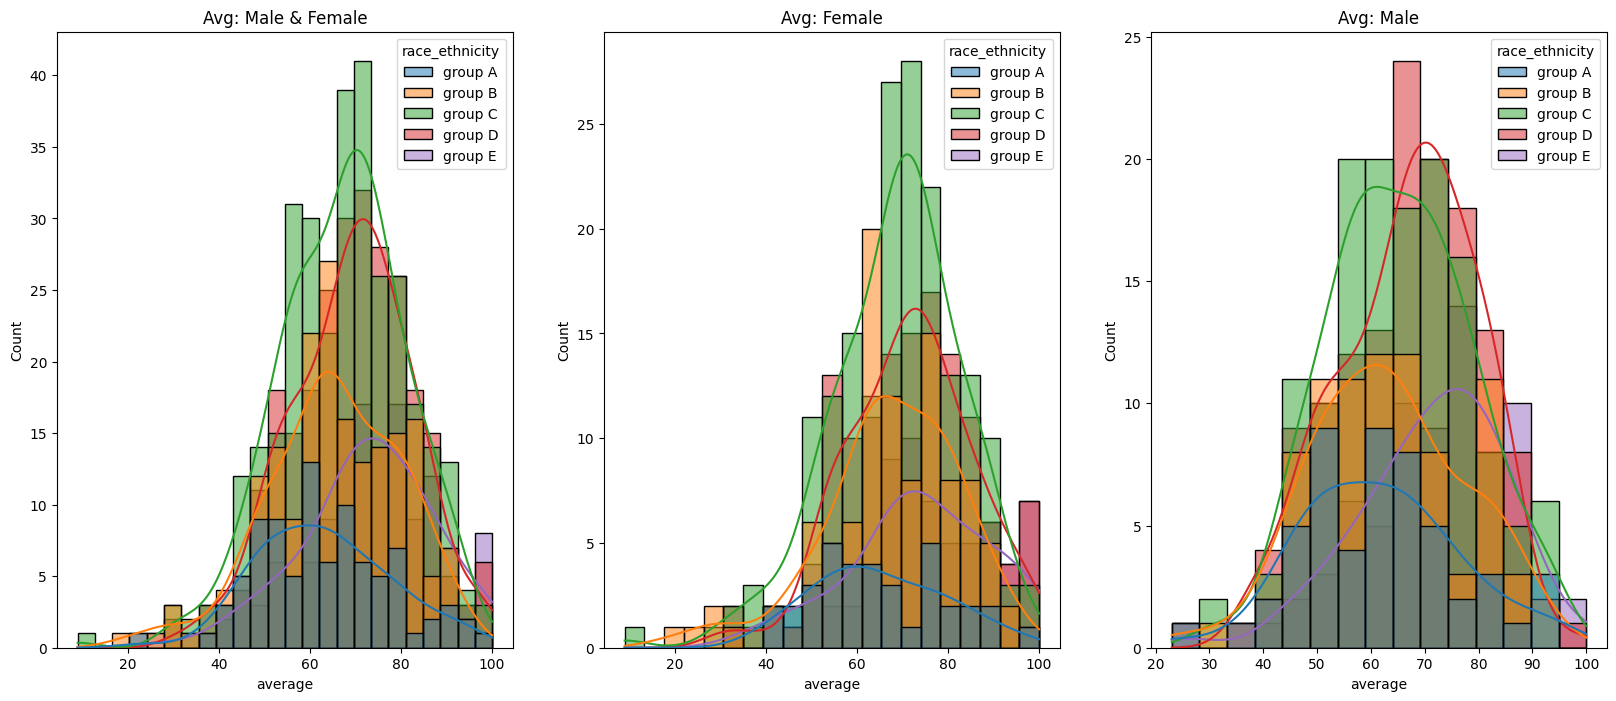

In [30]:
# impact of ethnicity

hue_order = sorted(df['race_ethnicity'].unique())

plt.subplots(1,3, figsize=(20,8))
plt.subplot(131)
sns.histplot(data=df, x="average", kde=True, hue="race_ethnicity", hue_order=hue_order)
plt.title("Avg: Male & Female")
plt.subplot(132)
sns.histplot(data=df[df.gender == "female"], x="average", kde=True, hue="race_ethnicity", hue_order=hue_order)
plt.title("Avg: Female")
plt.subplot(133)
sns.histplot(data=df[df.gender == "male"], x="average", kde=True, hue="race_ethnicity", hue_order=hue_order)
plt.title("Avg: Male")
plt.show()

Observation:
- Students of group A and group B tend to perform poorly in exam.

### 4.2 Maximum score of students in all 3 subjects

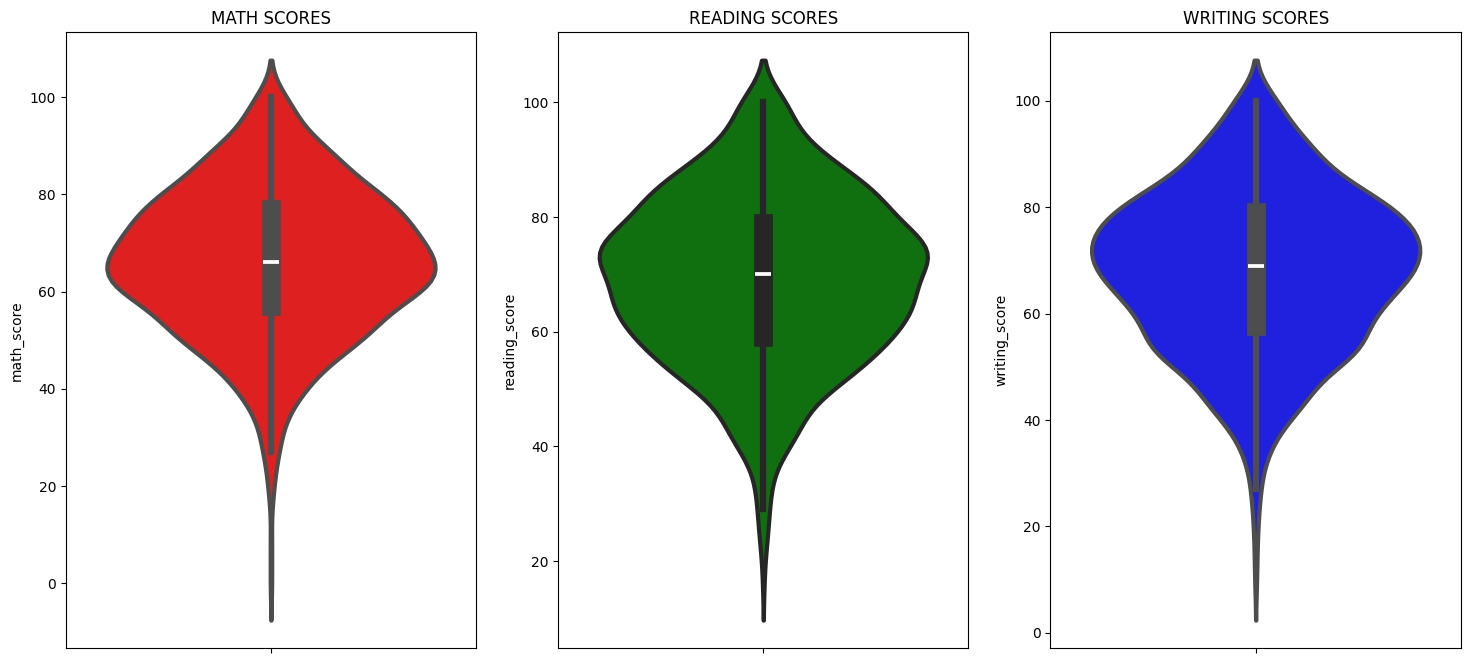

In [33]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Observation:
- From the above three plots its clearly visible that most of the students score between 50-80

### 4.3 Multivariate analysis using pieplot

In [40]:
df['gender'].value_counts().index.values

'female'

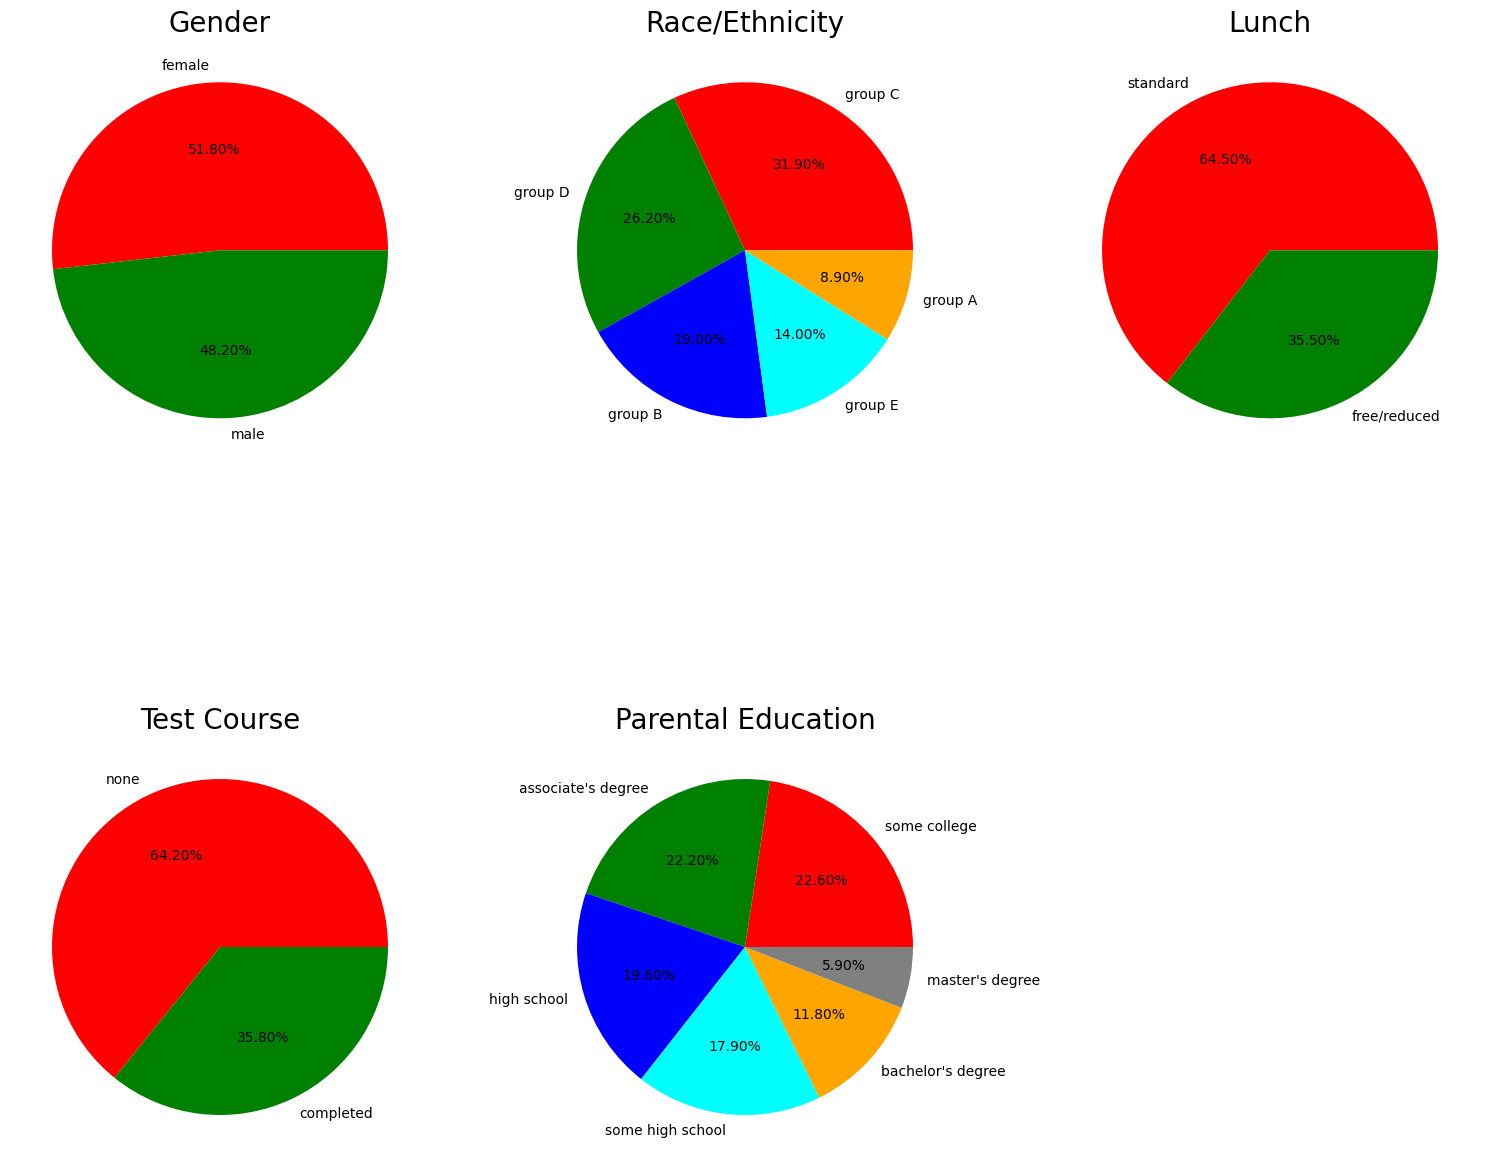

In [44]:
plt.rcParams['figure.figsize'] = (15, 15)

plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = size.index.tolist()
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(2, 3, 2)
size = df['race_ethnicity'].value_counts()
labels = size.index.tolist()
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = size.index.tolist()
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(2, 3, 4)
size = df['test_preparation_course'].value_counts()
labels = size.index.tolist()
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(2, 3, 5)
size = df['parental_level_of_education'].value_counts()
labels = size.index.tolist()
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Observation:
- Number of Male and feamale students is almost equal
- Number of students in group C are highest
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "some college" is greater followed closely by "associate's degree"

### 4.4 Feature wise visualization

#### 4.4.1 Gender column
- How is distribution of gender?
- is gender has any impact on student's performance?

Univariate Analysis (How is distribution of Gender?)

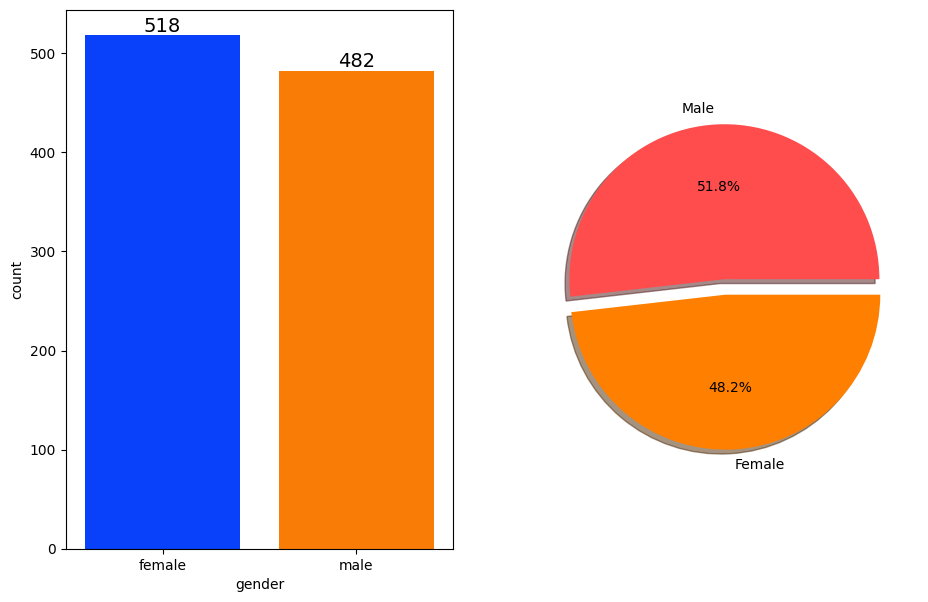

In [45]:
f,ax=plt.subplots(1,2,figsize=(11,7))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=14)
    
ax[1].pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

Bivariate Analysis (Is gender has any impact on students performance?)

In [48]:
df.groupby('gender')[["average", "math_score"]].mean()

,average,math_score
gender,,
female,69.569498,63.633205
male,65.837483,68.728216


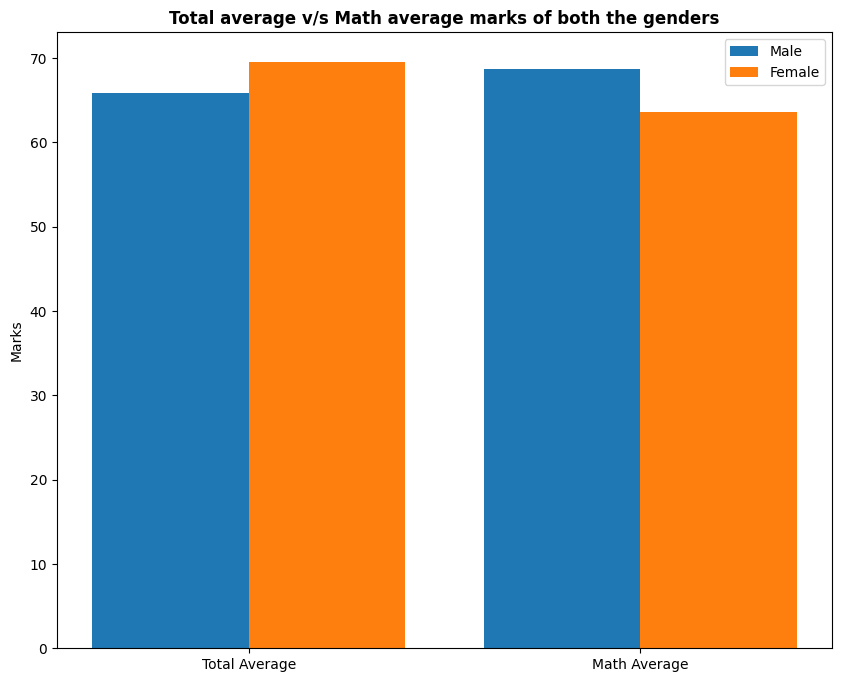

In [49]:
gender_group = df.groupby('gender')[["average", "math_score"]].mean()

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

- On an average females have a better overall score than male.
- whereas males have scored higher in Maths.

#### 4.4.2 Race/ Ethnicity column
- How is Group wise distribution?
- Is race/ethnicity has any impact on student's performance?

Univariate Analysis (How is group wise distribution?)

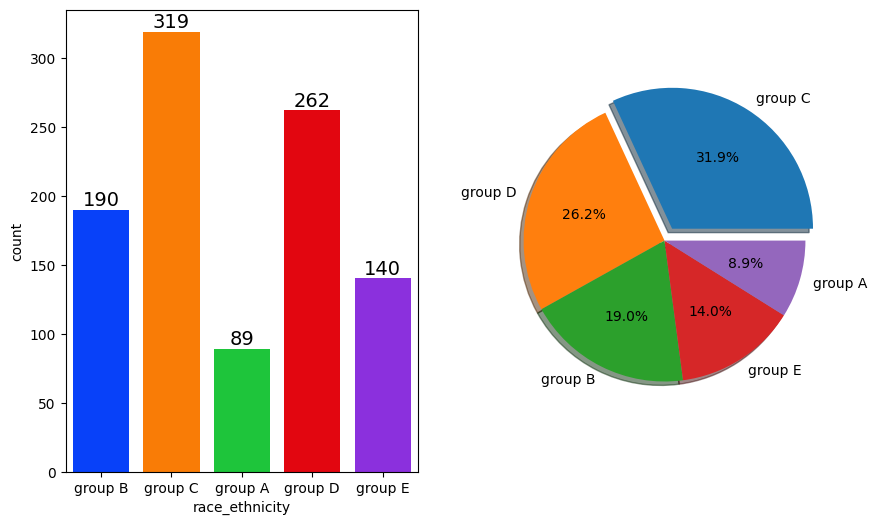

In [51]:
f,ax=plt.subplots(1,2,figsize=(10,6))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=14)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index.tolist(),explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

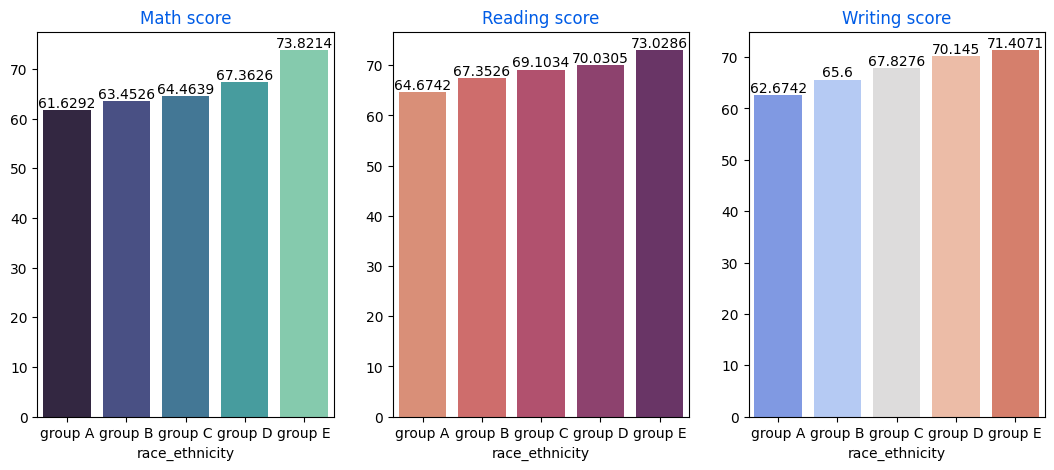

In [52]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(13,5))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=12)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=12)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=10)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=12)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=10)


- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socio-economic status have a lower avg in all course subjects

#### 4.4.3 Parental Level of Education column

- What is educational background of student's parent?
- Is parental education has any impact on student's performance?

Univariate Analysis (What is educational background of student's parent?

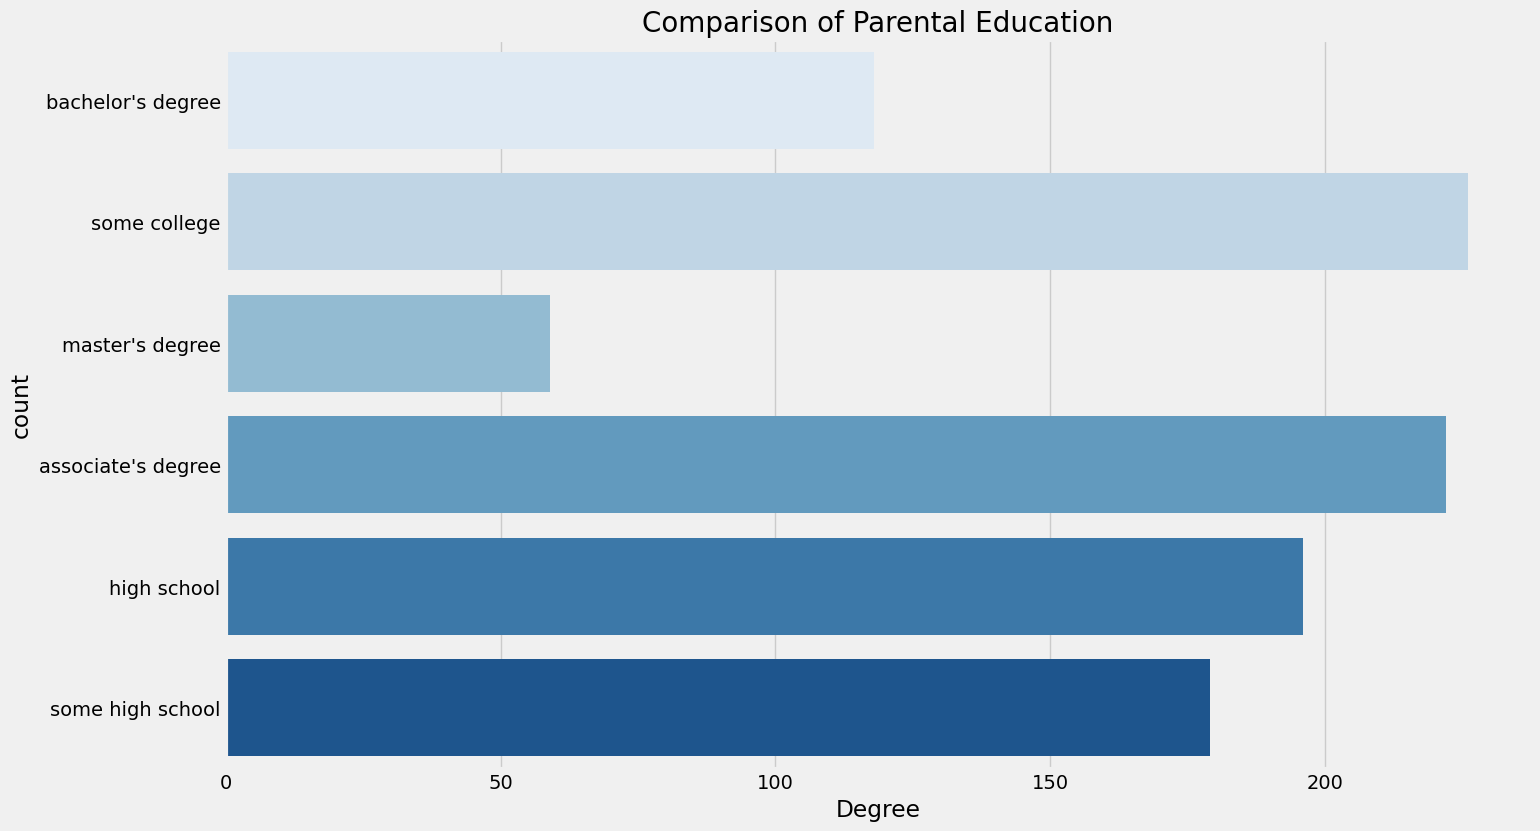

In [54]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data=df, y=df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

- Largest number of parents are from some college.

Bivariate Analysis (Is parental education has any impact on student's performance?)

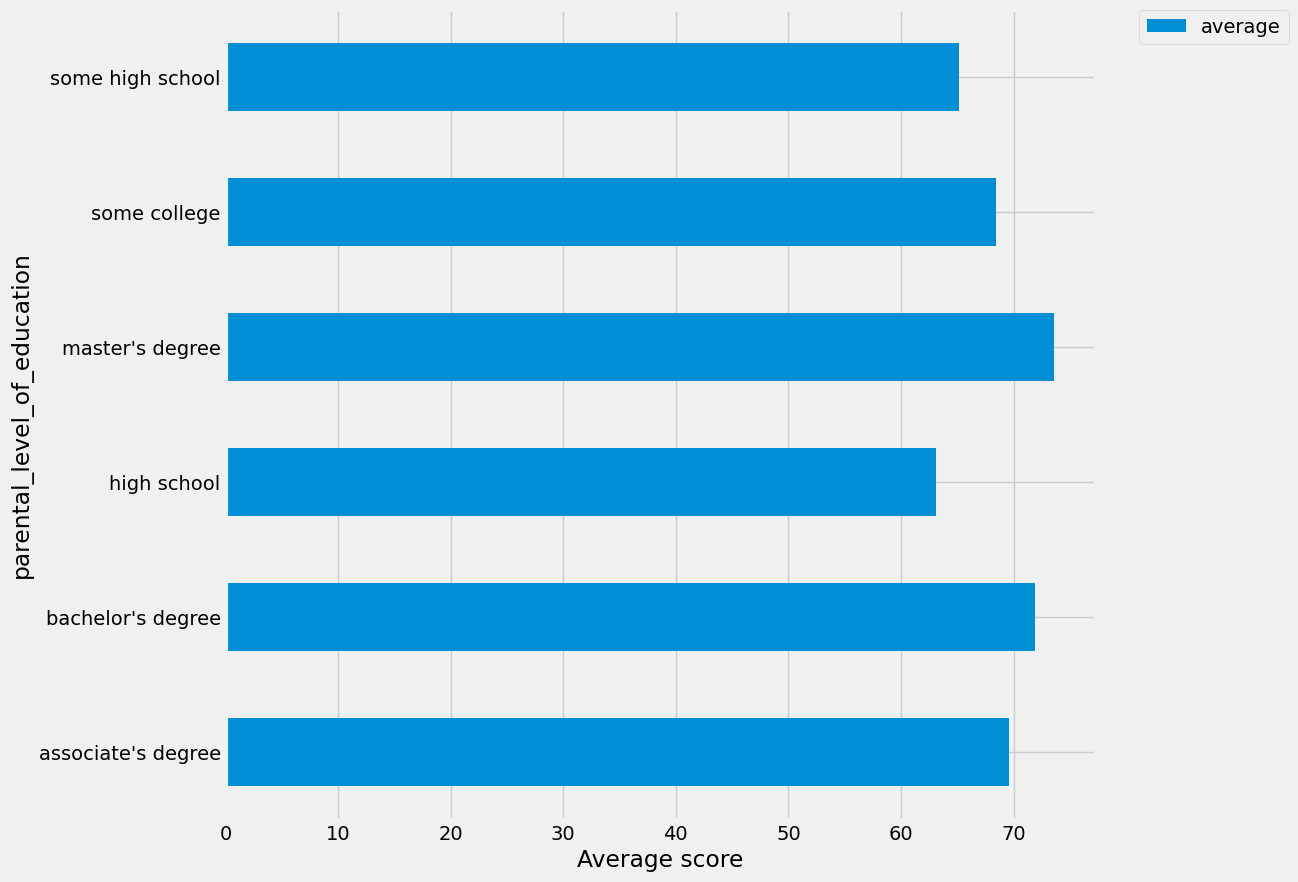

In [55]:
df.groupby("parental_level_of_education")["average"].agg("mean").plot(kind="barh", figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel("Average score")
plt.show()

- The score of students whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 Lunch column

- Which type of lunch is most common among students?
- What is the effect of lunch type on test results?

Univariate Analysis (Which type of lunch is most common among students?)

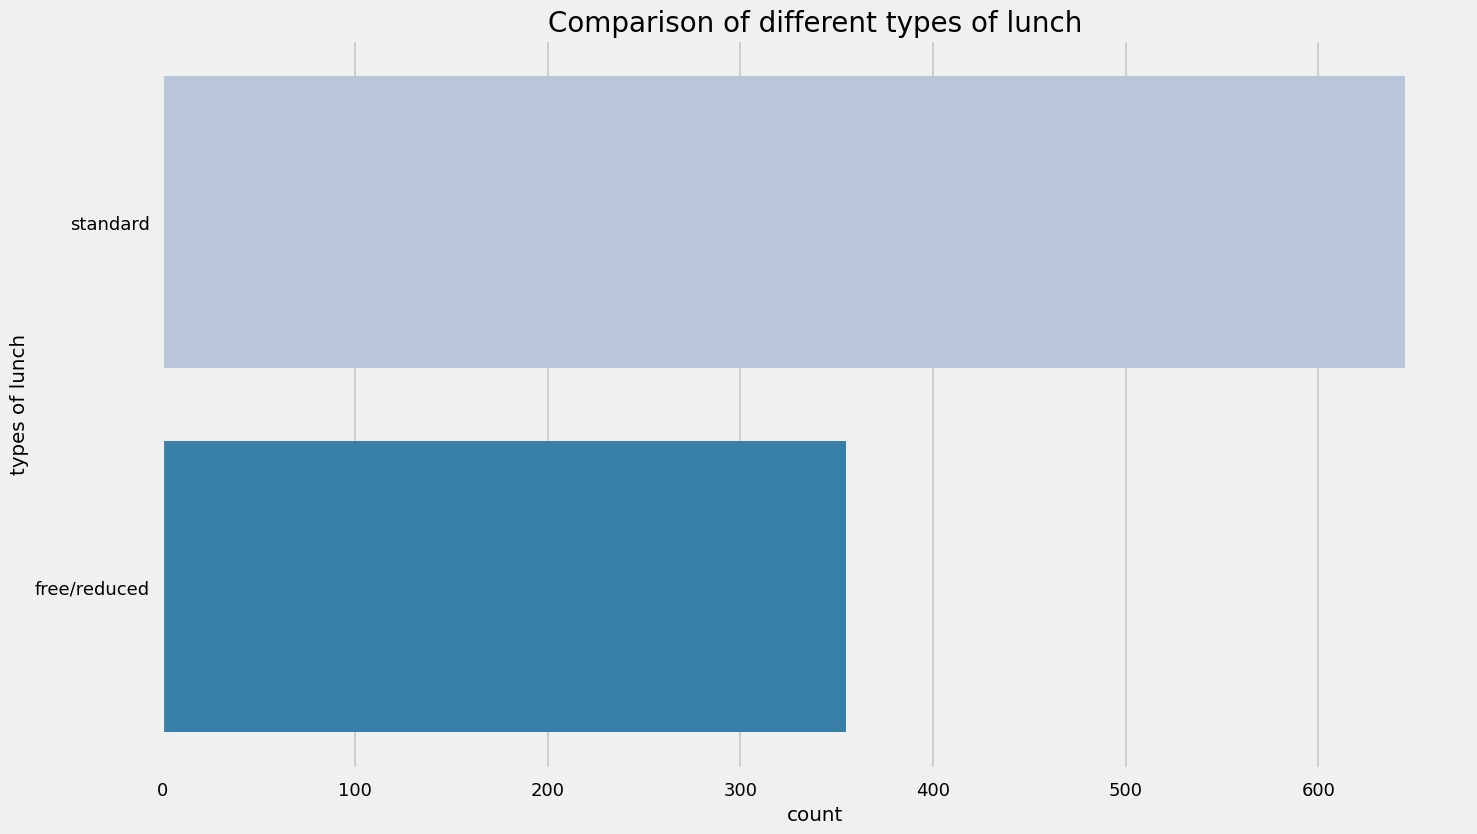

In [56]:
plt.figure(figsize = (15, 9))
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('count')
plt.ylabel('types of lunch')
plt.show()

- Students being served Standard lunch was more than free lunch

Bivariate Analysis (Is lunch type intake has any impact on student's performance?)

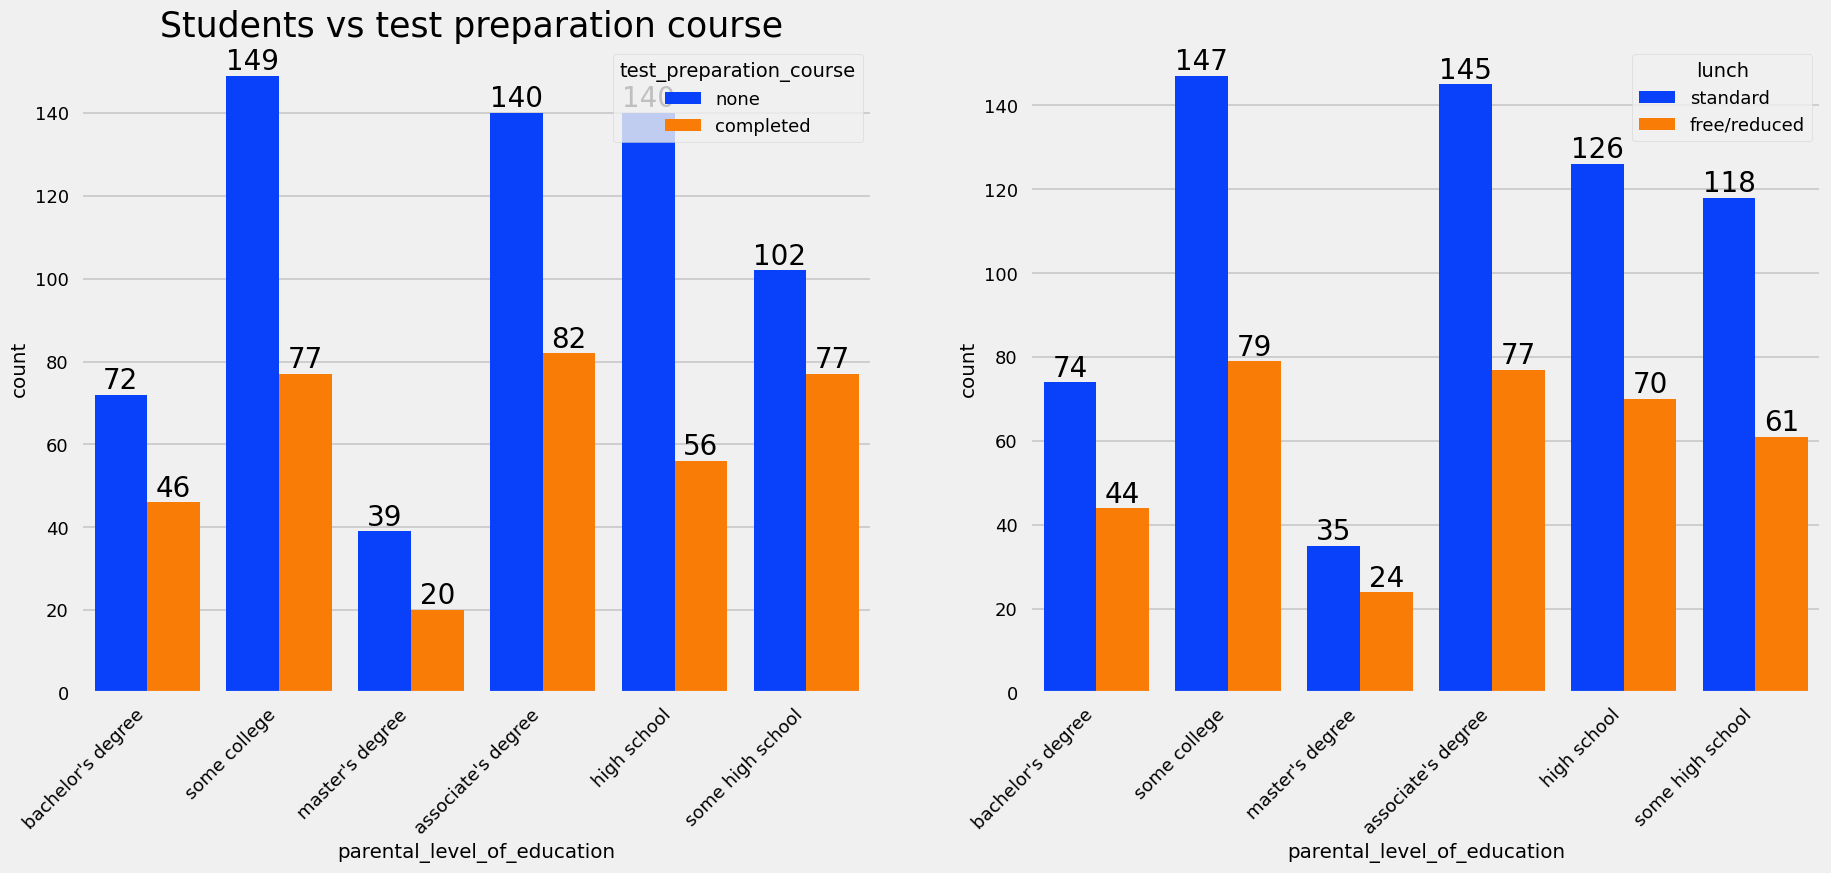

In [58]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

# Rotate x-ticks for the first plot
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

# Rotate x-ticks for the second plot
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")

plt.show()

- Students who get Standard Lunch tend to perform better than students who get free/ reduced lunch

#### 4.4.5 Test preparation course column

- Which type of lunch is most common among students?
- Is test preparation course has any impact on student's performance?

Bivariate Analysis (Is test preparation course has any impact on student's performance?)

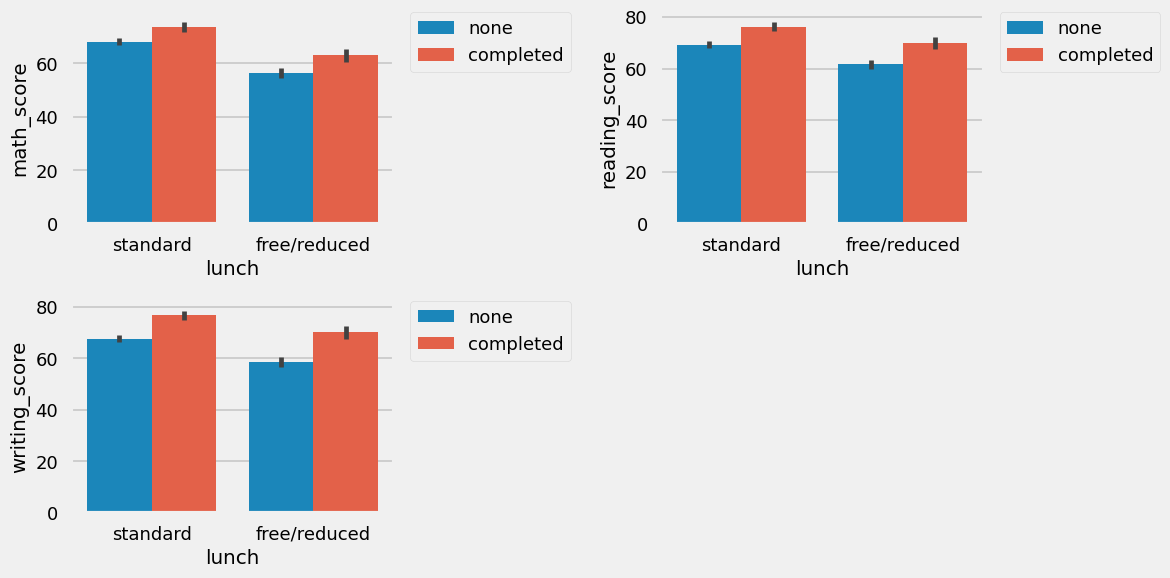

In [60]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.tight_layout()

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 Checking outliers

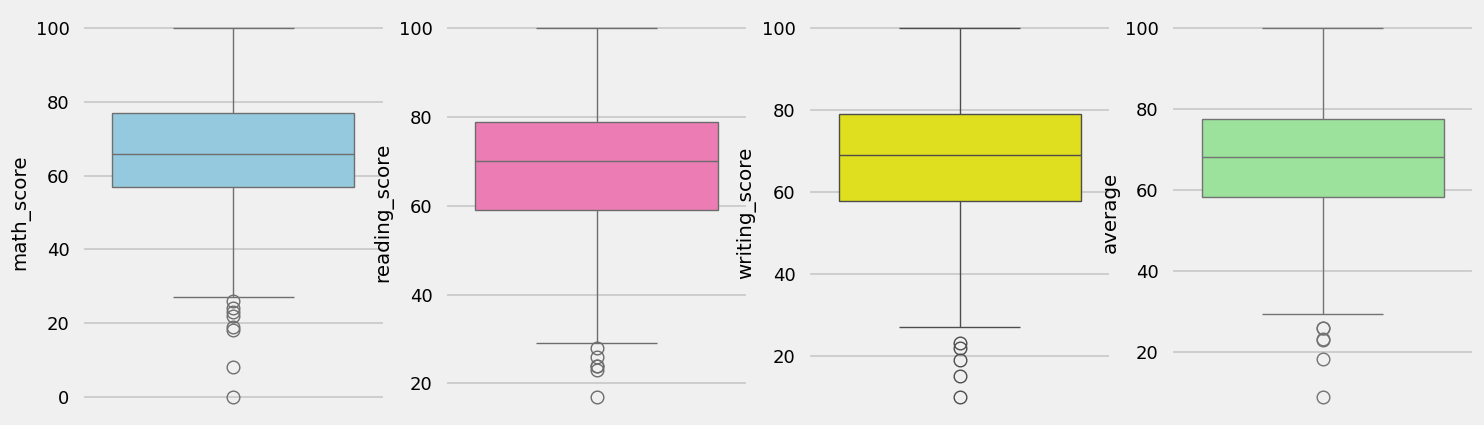

In [61]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')

plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')

plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')

plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')

plt.show()

#### 4.4.7 Multivariate Analysis using PairPlot

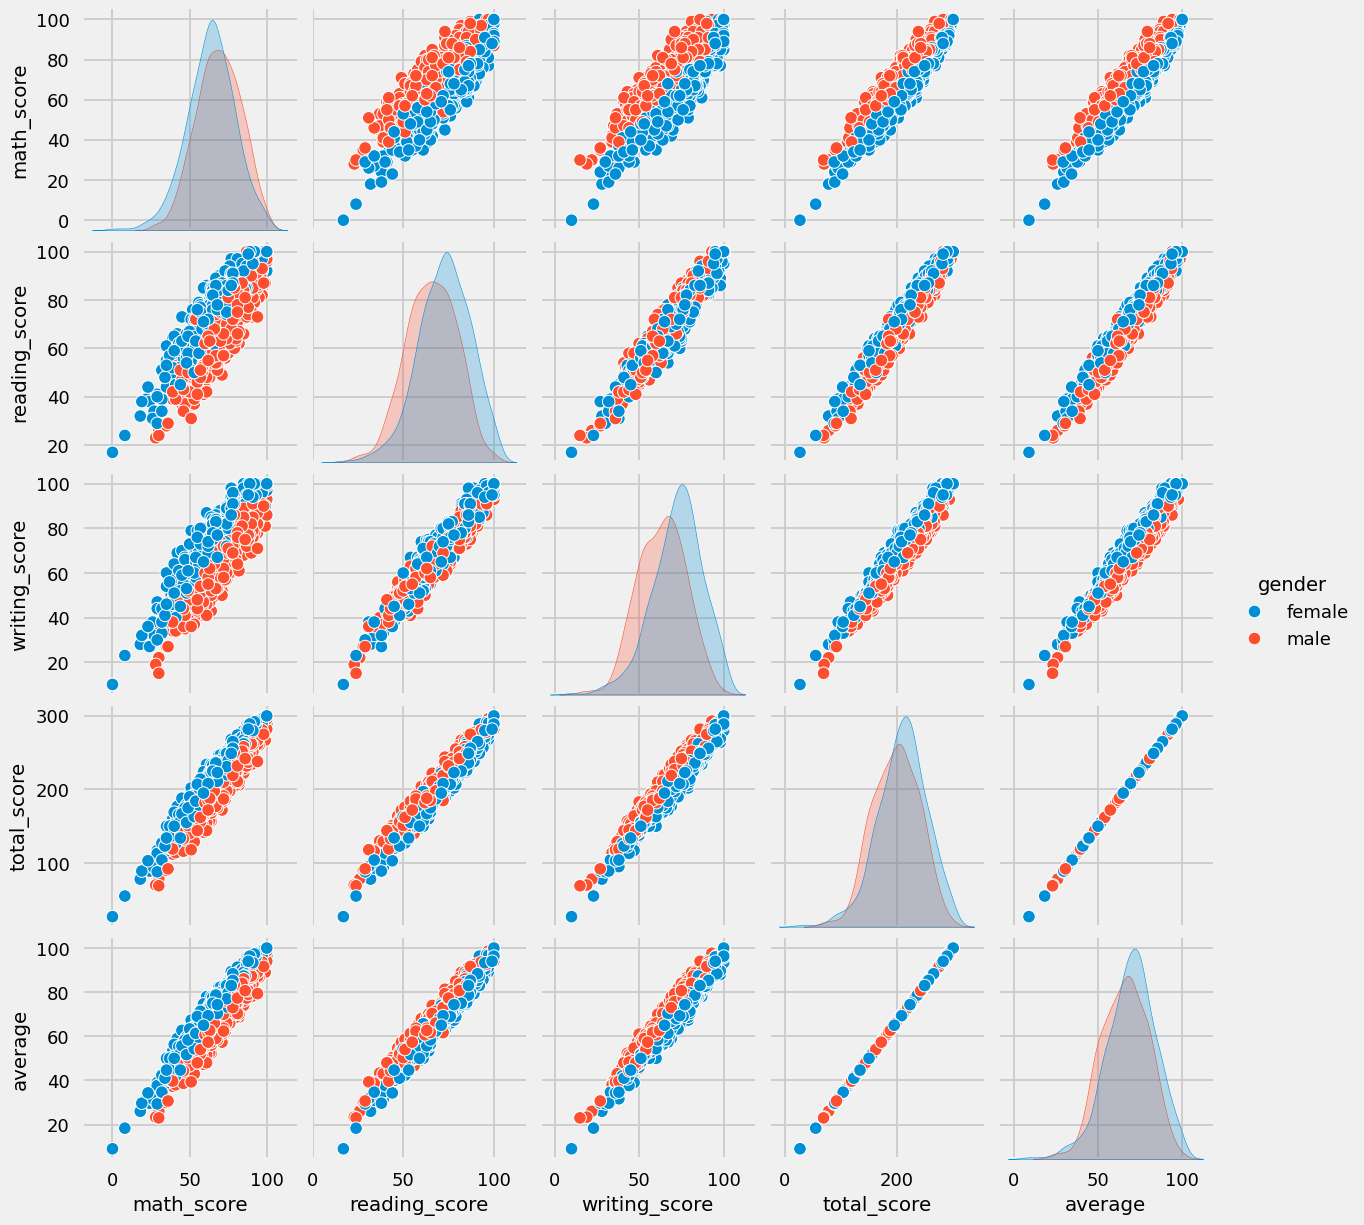

In [62]:
sns.pairplot(df, hue="gender")
plt.show()

- From the above plot it is clear that scores are in linear relation and female have slight edge over males

## 5. Conclusions
- Student's performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scores
- Student's performance is not much related with test preparation course.
- Finishing preparation course is beneficial.